<a href="https://colab.research.google.com/github/patternproject/r.sb.pos.2/blob/main/Survey_Analysis_With_v07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#READ ME

##Analysis of Survey Data for POS
##Iteration 2
##Using R

#### Renaming it from:
#### Separate_NorthSouth_Data_v12.ipynb
#### to
#### Survey Data Analysis v01.ipnyb

This file takes in "Extract of Daily POS Data" in excel format and outputs two files, one for North and other for South region

#History

v1: First Iteration

v2: First run of North and South completed

v3: Changed write xlsx to incoporate multiple sheets. Added System Date to Output File Name

v4: Adding create "survey summary" section from "Survey-Summary" colab 

v5: Continuation of v4. Fixing Special characters in Col Names

v6: Continuation of v5. Restructured Code

v7: Fixing Col Names for Without POS

v8: Adding Basic Graphs

v9: Automate UniVariate Analysis using PURRR

v10: Continuation of v9

v11: Continuation of v10. Moving from count to proportions

v12: Continuation of v11

-------------------------------
Renamed as: Survey Data Analysis 01. ipnyb
-------------------------------

v01: No change

v02: Removed code writing output/sample data

v03: Fixing the TODO part for Uni-Var analysis

v04: Pended the TODO part, replicating the Uni-Var analysis done so far on Without POS, on With POS data

Clean data has been dumped in CSV at end of v03, use it to generate it again, if required.

This file replaces the analysis on With POS, instead of copy-pasting to reduce the file size

v05: Loading the data cleaned in v03 and v04, removing all the cleanup code

v06: setting the order of factor levels for better plots

v07: v06 Contd

Renaming it as: Survey Analysis-With v07

## Setup

In [336]:
# Library
library(ggplot2)
library(tidyverse)
#install.packages("readxl")
library(readxl)

In [337]:
# conditional install - Janitor
list.of.packages <- c("janitor")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(janitor)

In [338]:
# conditional install - openxlsx

list.of.packages <- c("openxlsx")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

library(openxlsx)

In [339]:
# explore later
# https://slcladal.github.io/surveys.html

# install libraries
#install.packages(c("knitr", "lattice", "tidyverse", "likert", 
#                   "MASS", "psych", "viridis", "ggplot2", 
#                   "userfriendlyscience"))

Explore later:
http://gdfe.co/srvyr/articles/srvyr-vs-survey.html

# Setting Input Files

In [340]:
## With POS File

#input_file = '/content/With - Survey Summary Report_ 20201113.xlsx'
with_pos_file = '/content/SurveyData-withPOS-2021May10.xlsx'

In [341]:
## Without POS File

#input_file_2 = '/content/Without - Survey Summary Report_ 20201113.xlsx'
without_pos_file = '/content/SurveyData-withoutPOS-2021May10.xlsx'

# Input Data

In [342]:
# reading in input File

df_with = read_xlsx(with_pos_file, sheet=1)
df_without = read_xlsx(without_pos_file, sheet=1)

In [343]:
# printing DF
print(as_tibble(df_with))

# A tibble: 1,210 x 39
   date                RESP_ID SB_EMP_CODE SB_USER_NAME   SB_BU      SB_DEPT    
   <dttm>                <dbl>       <dbl> <chr>          <chr>      <chr>      
 1 2020-10-25 00:00:00    6881       30919 Farasat Ullah… Customer … Operations…
 2 2020-10-25 00:00:00    6883       33409 Muhammad Ahmar Customer … Operations…
 3 2020-10-25 00:00:00    6884       33409 Muhammad Ahmar Customer … Operations…
 4 2020-10-25 00:00:00    6885       33409 Muhammad Ahmar Customer … Operations…
 5 2020-10-25 00:00:00    6886       33409 Muhammad Ahmar Customer … Operations…
 6 2020-10-25 00:00:00    6887       33409 Muhammad Ahmar Customer … Operations…
 7 2020-10-25 00:00:00    6888       33409 Muhammad Ahmar Customer … Operations…
 8 2020-10-25 00:00:00    6890       33409 Muhammad Ahmar Customer … Operations…
 9 2020-10-25 00:00:00    6891       30859 Naveed Arshad  Customer … Operations…
10 2020-10-25 00:00:00    6895       30859 Naveed Arshad  Customer … Operations…
# … w

In [344]:
## inspect the data
str(df_with)

tibble[,39] [1,210 × 39] (S3: tbl_df/tbl/data.frame)
 $ date                          : POSIXct[1:1210], format: "2020-10-25" "2020-10-25" ...
 $ RESP_ID                       : num [1:1210] 6881 6883 6884 6885 6886 ...
 $ SB_EMP_CODE                   : num [1:1210] 30919 33409 33409 33409 33409 ...
 $ SB_USER_NAME                  : chr [1:1210] "Farasat Ullah Shah" "Muhammad Ahmar" "Muhammad Ahmar" "Muhammad Ahmar" ...
 $ SB_BU                         : chr [1:1210] "Customer Services North" "Customer Services North" "Customer Services North" "Customer Services North" ...
 $ SB_DEPT                       : chr [1:1210] "Operations - CS North" "Operations - CS North" "Operations - CS North" "Operations - CS North" ...
 $ ORG_ADDRESS                   : chr [1:1210] "Barkat Plaza Bank Road" "Near mcc karachi company g 9 markez" "Mughal plaza Benazir chock tarnol isb" "Benazir chock azam colony islamabad" ...
 $ ORG_CITY                      : chr [1:1210] "Rawalpindi" "Islamabad" "Isl

In [345]:
# remove non-useful columns
df_with %>% select(!starts_with("SB")) -> df_with_1

df_with_1 %>% select(!c(date, ORG_PICTURE_LINK,ORG_VISITING_CARD, RESP_NAME , RESP_PHONE )) -> df_with_1



In [346]:
df_with_1 %>% glimpse()

Rows: 1,210
Columns: 28
$ RESP_ID                        <dbl> 6881, 6883, 6884, 6885, 6886, 6887, 688…
$ ORG_ADDRESS                    <chr> "Barkat Plaza Bank Road", "Near mcc kar…
$ ORG_CITY                       <chr> "Rawalpindi", "Islamabad", "Islamabad",…
$ ORG_POS_BUSINESS_IMPROVEMENT   <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes…
$ ORG_INTERNET_ACCESS            <chr> "No access", "I use my mobile as requir…
$ ORG_EXPAND_BUSINESS            <chr> "No", "Yes, short-term (upto 12 months)…
$ ORG_DELIVERY_SERVICE           <chr> "No", "Thinking about it", "Yes", "No",…
$ ORG_CUSTOMER_DATA              <chr> "Do not Store", "Do not Store, Use for …
$ ORG_EMP_COUNT                  <chr> "2", "3", "2", "1", "1", "2", "1", "1",…
$ ORG_INTERNET_DISRUPTION        <chr> "-", "Little", "Never", "-", "Little", …
$ ORG_NEW_POS_PAYMENT_PREF       <chr> "One Time Payment", "Recurring Payment …
$ ORG_NEW_POS_LANG_PREF          <chr> "English and Urdu", "English and Urdu",…
$ ORG_NAME      

## Multiple Choice Answers

1. Fixing Garbage Values

##### 1.1. ORG_POS_BUSINESS_IMPROVEMENT

Fancy Frequency Tables

https://cran.r-project.org/web/packages/janitor/vignettes/tabyls.html

In [347]:
df_with_1 %>% tabyl(ORG_POS_BUSINESS_IMPROVEMENT)

ORG_POS_BUSINESS_IMPROVEMENT,n,percent
<chr>,<dbl>,<dbl>
-,1,0.0008264463
No,836,0.6909090909
"No, Yes",6,0.0049586777
Yes,367,0.3033057851


Collapsing Categories or Values

https://r4ds.had.co.nz/factors.html



In [348]:
valid_levels <- c('No', 'Yes')

# And any values not in the set will be silently converted to NA:
# factor(df_with_1$ORG_POS_BUSINESS_IMPROVEMENT, levels = valid_levels)

# to see warnings
# parse_factor(df_with_1$ORG_POS_BUSINESS_IMPROVEMENT, levels = valid_levels)

# to set as the levels occur in data
df_with_1$ORG_POS_BUSINESS_IMPROVEMENT %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_POS_BUSINESS_IMPROVEMENT


In [349]:
df_with_1 <- df_with_1 %>%
mutate (ORG_POS_BUSINESS_IMPROVEMENT = fct_recode(ORG_POS_BUSINESS_IMPROVEMENT,
'No' = '-',
'No' = 'No, Yes')) #%>% 
#count(ORG_POS_BUSINESS_IMPROVEMENT)


In [350]:
tabyl(df_with_1$ORG_POS_BUSINESS_IMPROVEMENT)

df_with_1$ORG_POS_BUSINESS_IMPROVEMENT,n,percent
<fct>,<dbl>,<dbl>
Yes,367,0.3033058
No,843,0.6966942


##### 1.2  ORG_INTERNET_ACCESS

In [351]:
tabyl(df_with_1$ORG_INTERNET_ACCESS)

df_with_1$ORG_INTERNET_ACCESS,n,percent
<chr>,<dbl>,<dbl>
Dedicated connection,264,0.218181818
"Dedicated connection, I use my mobile as required",3,0.002479339
I use my mobile as required,594,0.490909091
No access,349,0.288429752


In [352]:
df_with_1$ORG_INTERNET_ACCESS %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_INTERNET_ACCESS

In [353]:
tabyl(df_with_1$ORG_INTERNET_ACCESS)

df_with_1$ORG_INTERNET_ACCESS,n,percent
<fct>,<dbl>,<dbl>
No access,349,0.288429752
I use my mobile as required,594,0.490909091
Dedicated connection,264,0.218181818
"Dedicated connection, I use my mobile as required",3,0.002479339


In [354]:
df_with_1 <- df_with_1 %>%
mutate (ORG_INTERNET_ACCESS = fct_recode(ORG_INTERNET_ACCESS,
'Dedicated' = 'Dedicated connection, I use my mobile as required',
'None' = 'No access',
'Mobile' = 'I use my mobile as required',
'Dedicated' = 'Dedicated connection')) #%>% 
#count(ORG_INTERNET_ACCESS)

In [355]:
tabyl(df_with_1$ORG_INTERNET_ACCESS)

df_with_1$ORG_INTERNET_ACCESS,n,percent
<fct>,<dbl>,<dbl>
None,349,0.2884298
Mobile,594,0.4909091
Dedicated,267,0.2206612


##### 1.3 ORG_EXPAND_BUSINESS  

In [356]:
df_with_1$ORG_EXPAND_BUSINESS %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_EXPAND_BUSINESS

In [357]:
tabyl(df_with_1$ORG_EXPAND_BUSINESS)

df_with_1$ORG_EXPAND_BUSINESS,n,percent
<fct>,<dbl>,<dbl>
No,655,0.54132231
"Yes, short-term (upto 12 months)",47,0.03884298
"Yes, immediately (upto 6 months)",218,0.18016529
"Yes, long-term (12+ months)",290,0.23966942


In [358]:
df_with_1 <- df_with_1 %>%
mutate (ORG_EXPAND_BUSINESS = fct_recode(ORG_EXPAND_BUSINESS,
'Y:short-term' = 'Yes, short-term (upto 12 months)',
'Y:immediately' = 'Yes, immediately (upto 6 months)',
'Y:long-term' = 'Yes, long-term (12+ months)')) #%>% 
#count(ORG_EXPAND_BUSINESS)

In [359]:
tabyl(df_with_1$ORG_EXPAND_BUSINESS)

df_with_1$ORG_EXPAND_BUSINESS,n,percent
<fct>,<dbl>,<dbl>
No,655,0.54132231
Y:short-term,47,0.03884298
Y:immediately,218,0.18016529
Y:long-term,290,0.23966942


##### 1.4 ORG_DELIVERY_SERVICE  

In [360]:
tabyl(df_with_1$ORG_DELIVERY_SERVICE)

df_with_1$ORG_DELIVERY_SERVICE,n,percent
<chr>,<dbl>,<dbl>
No,984,0.813223140
"No, Yes",2,0.001652893
Thinking about it,108,0.089256198
"Thinking about it, Yes",2,0.001652893
Yes,114,0.094214876


In [361]:
df_with_1$ORG_DELIVERY_SERVICE %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_DELIVERY_SERVICE

In [362]:
df_with_1 <- df_with_1 %>%
mutate (ORG_DELIVERY_SERVICE = fct_recode(ORG_DELIVERY_SERVICE,
'No' = 'No, Yes',
'Thinking about it' = 'Thinking about it, Yes')) #%>% 
#count(ORG_DELIVERY_SERVICE)

In [363]:
tabyl (df_with_1$ORG_DELIVERY_SERVICE)

df_with_1$ORG_DELIVERY_SERVICE,n,percent
<fct>,<dbl>,<dbl>
No,986,0.81487603
Thinking about it,110,0.09090909
Yes,114,0.09421488


##### 1.5 ORG_CUSTOMER_DATA

In [364]:
#df_with_1 <- df_with

In [365]:
tabyl(df_with_1$ORG_CUSTOMER_DATA)

df_with_1$ORG_CUSTOMER_DATA,n,percent
<chr>,<dbl>,<dbl>
-,4,0.0033057851
Do not Store,370,0.3057851240
"Do not Store, Store, but do not use",2,0.0016528926
"Do not Store, Use for delivery (sending ordered items)",1,0.0008264463
"Do not Store, Use for discounts (repeated purchases)",341,0.2818181818
"Do not Store, Use for discounts (repeated purchases), Use for sending SMS (advertisement)",2,0.0016528926
"Do not Store, Use for sending SMS (advertisement)",1,0.0008264463
"Store, but do not use",121,0.1000000000
"Store, but do not use, Use for delivery (sending ordered items), Use for discounts (repeated purchases)",2,0.0016528926


replace , with space

In [366]:
df_with_1 <- df_with_1 %>% 
  mutate(ORG_CUSTOMER_DATA = str_replace(ORG_CUSTOMER_DATA, "Store, but do not use", "Store but do not use")) #%>%
  #tabyl(ORG_CUSTOMER_DATA)

In [367]:
tabyl(df_with_1$ORG_CUSTOMER_DATA)

df_with_1$ORG_CUSTOMER_DATA,n,percent
<chr>,<dbl>,<dbl>
-,4,0.0033057851
Do not Store,370,0.3057851240
"Do not Store, Store but do not use",2,0.0016528926
"Do not Store, Use for delivery (sending ordered items)",1,0.0008264463
"Do not Store, Use for discounts (repeated purchases)",341,0.2818181818
"Do not Store, Use for discounts (repeated purchases), Use for sending SMS (advertisement)",2,0.0016528926
"Do not Store, Use for sending SMS (advertisement)",1,0.0008264463
Store but do not use,121,0.1000000000
"Store but do not use, Use for delivery (sending ordered items), Use for discounts (repeated purchases)",2,0.0016528926


https://mgimond.github.io/ES218/Week03b.html

https://stackoverflow.com/questions/45696738/tallying-multiple-choice-entries-in-a-single-column-in-a-r-dataframe-programmati

In [368]:

# my_survey2 <- my_survey %>%
#  separate_rows(question.2) %>%
#  count(question.2) %>%
#  rename(response = question.2, count = n)

df_temp <- df_with_1 %>%
  separate_rows(ORG_CUSTOMER_DATA, sep=', ')

In [369]:
df_temp$ORG_CUSTOMER_DATA %>% glimpse()
# from 1210 to 1693 rows

 chr [1:1693] "Do not Store" "Do not Store" ...


In [370]:
df_temp <- df_with_1 %>%
  separate_rows(ORG_CUSTOMER_DATA, sep=',') %>%
  count(ORG_CUSTOMER_DATA) %>%
  rename(response = ORG_CUSTOMER_DATA, count = n)


In [371]:
df_temp %>% glimpse()

Rows: 10
Columns: 2
$ response <chr> " Store but do not use", " Use for delivery (sending ordered …
$ count    <int> 2, 3, 434, 44, 4, 717, 174, 48, 258, 9


In [372]:
df_temp %>% tibble() -> df_temp

In [373]:
df_temp

response,count
<chr>,<int>
Store but do not use,2
Use for delivery (sending ordered items),3
Use for discounts (repeated purchases),434
Use for sending SMS (advertisement),44
-,4
Do not Store,717
Store but do not use,174
Use for delivery (sending ordered items),48
Use for discounts (repeated purchases),258


In [374]:
df_temp$response %>% 
factor() %>% 
fct_inorder() -> df_temp$response

In [375]:
df_temp

response,count
<fct>,<int>
Store but do not use,2
Use for delivery (sending ordered items),3
Use for discounts (repeated purchases),434
Use for sending SMS (advertisement),44
-,4
Do not Store,717
Store but do not use,174
Use for delivery (sending ordered items),48
Use for discounts (repeated purchases),258


In [376]:
levels(df_temp$response)

[1] " Store but do not use"                    
 [2] " Use for delivery (sending ordered items)"
 [3] " Use for discounts (repeated purchases)"  
 [4] " Use for sending SMS (advertisement)"     
 [5] "-"                                        
 [6] "Do not Store"                             
 [7] "Store but do not use"                     
 [8] "Use for delivery (sending ordered items)" 
 [9] "Use for discounts (repeated purchases)"   
[10] "Use for sending SMS (advertisement)"

In [377]:
df_temp %>%
mutate (response1 = fct_recode(response,
' Store but do not use ' = 'Store but do not use')) %>% 
count(response1)

response1,n
<fct>,<int>
Store but do not use,1
Use for delivery (sending ordered items),1
Use for discounts (repeated purchases),1
Use for sending SMS (advertisement),1
-,1
Do not Store,1
Store but do not use,1
Use for delivery (sending ordered items),1
Use for discounts (repeated purchases),1


In [378]:
#tabyl(df_temp)

Not able to resolve ORG_CUSTOMER_DATA
or in general the case for multiple-values, where we do not lump low-occurences into the high-occurences

##### 1.6 ORG_EMP_COUNT  

In [379]:
#df_with_1 = df_with

In [380]:
df_with_1 %>% tabyl(ORG_EMP_COUNT)

ORG_EMP_COUNT,n,percent
<chr>,<dbl>,<dbl>
1,463,0.3826446281
"1, 2",2,0.0016528926
10,3,0.0024793388
2,242,0.2000000000
3,231,0.1909090909
4,145,0.1198347107
5,93,0.0768595041
6,24,0.0198347107
7,3,0.0024793388


In [381]:
df_with_1$ORG_EMP_COUNT %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_EMP_COUNT

In [382]:
levels(df_with_1$ORG_EMP_COUNT)

[1] "2"            "3"            "1"            "10"           "4"           
 [6] "6"            "More than 10" "9"            "5"            "1, 2"        
[11] "7"            "8"

In [383]:
df_with_1 <- df_with_1 %>%
mutate (ORG_EMP_COUNT = fct_recode(ORG_EMP_COUNT,
'1' = '1, 2',
'10+' = 'More than 10')) #%>% 
#count(ORG_EMP_COUNT)

In [384]:
tabyl(df_with_1$ORG_EMP_COUNT)

df_with_1$ORG_EMP_COUNT,n,percent
<fct>,<dbl>,<dbl>
2,242,0.2000000000
3,231,0.1909090909
1,465,0.3842975207
10,3,0.0024793388
4,145,0.1198347107
6,24,0.0198347107
10+,2,0.0016528926
9,1,0.0008264463
5,93,0.0768595041


reordering levels

In [385]:
levels(df_with_1$ORG_EMP_COUNT)

[1] "2"   "3"   "1"   "10"  "4"   "6"   "10+" "9"   "5"   "7"   "8"

In [386]:
df_with_1 <- df_with_1 %>% 
   mutate (ORG_EMP_COUNT = fct_relevel(ORG_EMP_COUNT, 
   levels=c('1','2','3','4','5','6','7','8','9','10','10+')))

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


##### 1.7 ORG_INTERNET_DISRUPTION

In [387]:
df_with_1 %>% tabyl (ORG_INTERNET_DISRUPTION)

ORG_INTERNET_DISRUPTION,n,percent
<chr>,<dbl>,<dbl>
-,348,0.2876033058
A lot,20,0.0165289256
Little,136,0.1123966942
Never,353,0.2917355372
"Never, Sometimes",1,0.0008264463
No Internet,9,0.0074380165
Sometimes,343,0.2834710744


In [388]:
df_with_1$ORG_INTERNET_DISRUPTION %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_INTERNET_DISRUPTION

In [389]:
levels(df_with_1$ORG_INTERNET_DISRUPTION)

[1] "-"                "Little"           "Never"            "Sometimes"       
[5] "A lot"            "Never, Sometimes" "No Internet"

In [390]:
df_with_1 <- df_with_1 %>%
mutate (ORG_INTERNET_DISRUPTION = fct_recode(ORG_INTERNET_DISRUPTION,
'Never' = '-',
'Sometimes' = 'Never, Sometimes')) #%>% 
#count(ORG_INTERNET_DISRUPTION)

In [391]:
tabyl(df_with_1$ORG_INTERNET_DISRUPTION)

df_with_1$ORG_INTERNET_DISRUPTION,n,percent
<fct>,<dbl>,<dbl>
Never,701,0.579338843
Little,136,0.112396694
Sometimes,344,0.284297521
A lot,20,0.016528926
No Internet,9,0.007438017


In [392]:
levels(df_with_1$ORG_INTERNET_DISRUPTION)

[1] "Never"       "Little"      "Sometimes"   "A lot"       "No Internet"

reordering levels

In [393]:
df_with_1 <- df_with_1 %>%
  mutate(ORG_INTERNET_DISRUPTION = fct_relevel(ORG_INTERNET_DISRUPTION, 
  levels = c('No Internet','Little','Sometimes','A lot','Never')))

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


##### 1.8 ORG_NEW_POS_PAYMENT_PREF

In [396]:
#df_with_1 <- df_with

In [397]:
tabyl(df_with_1$ORG_NEW_POS_PAYMENT_PREF)

df_with_1$ORG_NEW_POS_PAYMENT_PREF,n,percent
<chr>,<dbl>,<dbl>
-,119,0.0983471074
One Time Payment,527,0.4355371901
"One Time Payment, Recurring Payment - Every 3 Months",1,0.0008264463
Recurring Payment - Every 12 Months,442,0.3652892562
Recurring Payment - Every 3 Months,27,0.0223140496
Recurring Payment - Every 6 Months,56,0.0462809917
Recurring Payment - Every Month,38,0.0314049587


In [398]:
df_with_1$ORG_NEW_POS_PAYMENT_PREF	 %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_NEW_POS_PAYMENT_PREF	

In [399]:
levels(df_with_1$ORG_NEW_POS_PAYMENT_PREF)

[1] "One Time Payment"                                    
[2] "Recurring Payment - Every 12 Months"                 
[3] "Recurring Payment - Every Month"                     
[4] "Recurring Payment - Every 3 Months"                  
[5] "Recurring Payment - Every 6 Months"                  
[6] "-"                                                   
[7] "One Time Payment, Recurring Payment - Every 3 Months"

In [400]:
df_with_1 <- df_with_1 %>%
mutate (ORG_NEW_POS_PAYMENT_PREF = fct_recode(ORG_NEW_POS_PAYMENT_PREF,
'No ANS' = '-',
'One-Time' = 'One Time Payment',
'One-Time' = 'One Time Payment, Recurring Payment - Every 3 Months',
'Recurring:1M' = 'Recurring Payment - Every Month',
'Recurring:3M' = 'Recurring Payment - Every 3 Months',
'Recurring:6M' = 'Recurring Payment - Every 6 Months',
'Recurring:12M' = 'Recurring Payment - Every 12 Months'
)) #%>% 
#count(ORG_INTERNET_DISRUPTION)

In [401]:
tabyl(df_with_1$ORG_NEW_POS_PAYMENT_PREF)

df_with_1$ORG_NEW_POS_PAYMENT_PREF,n,percent
<fct>,<dbl>,<dbl>
One-Time,528,0.43636364
Recurring:12M,442,0.36528926
Recurring:1M,38,0.03140496
Recurring:3M,27,0.02231405
Recurring:6M,56,0.04628099
No ANS,119,0.09834711


In [402]:
df_with_1 <- df_with_1 %>%
mutate (ORG_NEW_POS_PAYMENT_PREF = fct_relevel(ORG_NEW_POS_PAYMENT_PREF,
levels=c('No ANS',
'One-Time',
'Recurring:1M',
'Recurring:3M',
'Recurring:6M',
'Recurring:12M'
))) 

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


In [403]:
tabyl(df_with_1$ORG_NEW_POS_PAYMENT_PREF)

df_with_1$ORG_NEW_POS_PAYMENT_PREF,n,percent
<fct>,<dbl>,<dbl>
No ANS,119,0.09834711
One-Time,528,0.43636364
Recurring:1M,38,0.03140496
Recurring:3M,27,0.02231405
Recurring:6M,56,0.04628099
Recurring:12M,442,0.36528926


##### 1.9 ORG_NEW_POS_LANG_PREF

In [404]:
tabyl(df_with_1$ORG_NEW_POS_LANG_PREF)

df_with_1$ORG_NEW_POS_LANG_PREF,n,percent
<chr>,<dbl>,<dbl>
English,488,0.4033057851
English and Urdu,721,0.5958677686
"English, English and Urdu",1,0.0008264463


In [405]:
df_with_1$ORG_NEW_POS_LANG_PREF	 %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_NEW_POS_LANG_PREF

In [406]:
levels(df_with_1$ORG_NEW_POS_LANG_PREF)

[1] "English and Urdu"          "English"                  
[3] "English, English and Urdu"

In [407]:
df_with_1 <- df_with_1 %>%
mutate (ORG_NEW_POS_LANG_PREF = fct_recode(ORG_NEW_POS_LANG_PREF,
'English and Urdu' = 'English, English and Urdu'
))

In [408]:
tabyl(df_with_1$ORG_NEW_POS_LANG_PREF)

df_with_1$ORG_NEW_POS_LANG_PREF,n,percent
<fct>,<dbl>,<dbl>
English and Urdu,722,0.5966942
English,488,0.4033058


##### 1.10 ORG_OUTLETS_COUNT

In [409]:
tabyl(df_with_1$ORG_OUTLETS_COUNT)

df_with_1$ORG_OUTLETS_COUNT,n,percent
<chr>,<dbl>,<dbl>
1,991,0.819008264
"1, 2",3,0.002479339
2,54,0.044628099
3,69,0.057024793
4,50,0.041322314
5,36,0.029752066
6 to 10,3,0.002479339
More than 10,4,0.003305785


In [410]:
df_with_1$ORG_OUTLETS_COUNT	 %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_OUTLETS_COUNT

In [411]:
levels(df_with_1$ORG_OUTLETS_COUNT)

[1] "1"            "2"            "4"            "3"            "5"           
[6] "6 to 10"      "1, 2"         "More than 10"

In [412]:
df_with_1 <- df_with_1 %>%
mutate (ORG_OUTLETS_COUNT = fct_recode(ORG_OUTLETS_COUNT,
'1' = '1, 2',
'10+' = 'More than 10'
))

In [413]:
tabyl(df_with_1$ORG_OUTLETS_COUNT)

df_with_1$ORG_OUTLETS_COUNT,n,percent
<fct>,<dbl>,<dbl>
1,994,0.821487603
2,54,0.044628099
4,50,0.041322314
3,69,0.057024793
5,36,0.029752066
6 to 10,3,0.002479339
10+,4,0.003305785


##### 1.11 ORG_NEW_POS_KIND

In [414]:
tabyl(df_with_1$ORG_NEW_POS_KIND)

df_with_1$ORG_NEW_POS_KIND,n,percent
<chr>,<dbl>,<dbl>
Stand-Alone: does not require internet connection,548,0.4528925620
"Stand-Alone: does not require internet connection, Web-Based: requires internet connection",1,0.0008264463
Web-Based: requires internet connection,661,0.5462809917


In [415]:
df_with_1$ORG_NEW_POS_KIND	 %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_NEW_POS_KIND

In [416]:
df_with_1 <- df_with_1 %>%
mutate (ORG_NEW_POS_KIND = fct_recode(ORG_NEW_POS_KIND,
'Stand-Alone' = 'Stand-Alone: does not require internet connection',
'Stand-Alone' = 'Stand-Alone: does not require internet connection, Web-Based: requires internet connection',
'Web-Based' = 'Web-Based: requires internet connection'))

##### 1.12 ORG_WILLINGNESS_TO_PAY_AMOUNT'

In [417]:
#df_with_1 <- df_with

In [418]:
tabyl(df_with_1$ORG_WILLINGNESS_TO_PAY_AMOUNT)

df_with_1$ORG_WILLINGNESS_TO_PAY_AMOUNT,n,percent
<chr>,<dbl>,<dbl>
-,154,0.1272727273
.,1,0.0008264463
=-,1,0.0008264463
0,53,0.0438016529
1,1,0.0008264463
1 thusnd,1,0.0008264463
"10,000 to 12,000",2,0.0016528926
100,2,0.0016528926
1000,86,0.0710743802


In [419]:
df_with_1$ORG_WILLINGNESS_TO_PAY_AMOUNT	 %>% 
factor() %>% 
fct_inorder() -> df_with_1$ORG_WILLINGNESS_TO_PAY_AMOUNT

In [420]:
levels(df_with_1$ORG_WILLINGNESS_TO_PAY_AMOUNT)

[1] "1000"                             "10000"                           
  [3] "500"                              "-"                               
  [5] "Medi health"                      "No"                              
  [7] "Don't want"                       "20000 Rs"                        
  [9] "50000"                            "0"                               
 [11] "5000"                             "Confirm after demo"              
 [13] "2000"                             "3000"                            
 [15] "Not sure yet"                     "30 to 50 thosend"                
 [17] "1500"                             "600"                             
 [19] "No idea"                          "Not sure"                        
 [21] "Less than 5000"                   "6000"                            
 [23] "After demo confirm"               "4000"                            
 [25] "After Demo"                       "Not willing"                     
 [27] "Its depends upon purchasing time" "50000 thousands"                 
 [29] "18000"                            "15000"                           
 [31] "na"                               "2 yere"                          
 [33] "5 thousand"                       "5 yere"                          
 [35] "i will no pay"                    "little agree"                    
 [37] "Depend on the offer"              "2 thousand"                      
 [39] "5 year"                           "1"                               
 [41] "2 Thousnd"                        "3 thousand"                      
 [43] "8000"                             "not agree"                       
 [45] "12000"                            "3 thousand per month"            
 [47] "120000"                           "3 thousnd"                       
 [49] "2500"                             "1 thusnd"                        
 [51] "After demo decide"                "16000"                           
 [53] "I am happy without it"            "10k"                             
 [55] "20k"                              "800"                             
 [57] "Not Confirmed"                    "."                               
 [59] "3500"                             "4500"                            
 [61] "Depends Upon Situation"           "7000"                            
 [63] "Not answer"                       "Not answered"                    
 [65] "2000 per week till 14000"         "must reasonable"                 
 [67] "not answered"                     "cant afford"                     
 [69] "depend on the features"           "No answered"                     
 [71] "depend on the offer"              "depend on the machine"           
 [73] "40to50 thosend"                   "Yearly"                          
 [75] "May Be"                           "1oo"                             
 [77] "Not yet"                          "200"                             
 [79] "Not idea"                         "750"                             
 [81] "5oo"                              "3ooo"                            
 [83] "Nit sure"                         "Not now"                         
 [85] "20003000"                         "2000 / 3000"                     
 [87] "1200"                             "3oo"                             
 [89] "1300"                             "1800"                            
 [91] "14"                               "11000"                           
 [93] "Not safisified"                   "1700"                            
 [95] "Decide at time of required"       "2200"                            
 [97] "700"                              "At purchasing time"              
 [99] "Time of required will decide"     "Not"                             
[101] "Confirm at purchasing time"       "Quarterly"                       
[103] "9000"                             "Depend on the features"          
[105] "depend on offer"                  "Monthly"

In [421]:
df_with_1 <- df_with_1 %>%
mutate (ORG_WILLINGNESS_TO_PAY_AMOUNT = fct_recode(ORG_WILLINGNESS_TO_PAY_AMOUNT,
'No ANS' = '-',
'No ANS' = 'Medi health',
'No ANS' = 'No',
'No ANS' = 'Don\'t want',
'No ANS' = 'Not sure yet',
'No ANS' = 'No idea',
'No ANS' = 'Not sure',
'No ANS' = 'Its depends upon purchasing time',
'No ANS' = 'na',
'No ANS' = '2 yere',
'No ANS' = '5 yere',
'No ANS' = 'i will no pay',
'No ANS' = 'little agree',
'No ANS' = 'Depend on the offer',
'No ANS' = '5 year',
'No ANS' = 'not agree',
'No ANS' = 'After demo decide',
'No ANS' = 'I am happy without it',
'No ANS' = 'Not Confirmed',
'No ANS' = '.',
'No ANS' = 'Depends Upon Situation',
'No ANS' = 'Not answer',
'No ANS' = 'Not answered',
'No ANS' = 'must reasonable',
'No ANS' = 'not answered',
'No ANS' = 'cant afford',
'No ANS' = 'depend on the features',
'No ANS' = 'No answered',
'No ANS' = 'depend on the offer',
'No ANS' = 'depend on the machine',
'No ANS' = 'Yearly',
'No ANS' = 'May Be',
'No ANS' = 'Not yet',
'No ANS' = 'Not idea',
'No ANS' = 'Nit sure',
'No ANS' = 'Not now',
'No ANS' = 'Not safisified',
'No ANS' = 'Decide at time of required',
'No ANS' = 'At purchasing time',
'No ANS' = 'Time of required will decide',
'No ANS' = 'Not',
'No ANS' = 'Confirm at purchasing time',
'No ANS' = 'Quarterly',
'No ANS' = 'Depend on the features',
'No ANS' = 'depend on offer',
'No ANS' = 'Monthly',
'No ANS' = 'Na',
'No ANS' = 'not sure',
'No ANS' = 'Not confirm',
'No ANS' = 'After demo',
'No ANS' = 'No.idea',
'No ANS' = 'No.o',
'No ANS' = 'Demand software price',
'No ANS' = 'no idea',
'No ANS' = 'NO IDEA',
'No ANS' = 'NOT SURE',
'No ANS' = 'Nkt sure',
'No ANS' = '=-',
'No ANS' = 'no ide',
'No ANS' = 'not.sure',
'No ANS' = 'After check softerware',
'No ANS' = 'At time of purchasing',
'No ANS' = 'Not confirm before check pos',
'No ANS' = 'not idea',
'No ANS' = 'Shopkeeper is good',
'No ANS' = 'noidea',
'No ANS' = 'notidea',
'No ANS' = 'Depends on situation',
'No ANS' = 'Depends on situatio',
'No ANS' = 'No Idea.',
'No ANS' = 'After Demo he decide',
'No ANS' = 'Confirm after demo',
'No ANS' = 'After demo confirm',
'No ANS' = 'After Demo',
'No ANS' = 'Not willing',
'No ANS' = 'Monhtly',
'No ANS' = 'not surew',
'10K+' = '20000 Rs',
'1K' = '1000',
'10K' = '10000',
'<1K' = '500',
'10K+' = '50000',
'5K' = '5000',
'2K' = '2000',
'3K' = '3000',
'10K+' = '30 to 50 thosend',
'5K' = 'Less than 5000',
'6K' = '6000',
'4K' = '4000',
'5K' = '50000 thousands',
'10K+' = '18000',
'10K+' = '15000',
'5K' = '5 thousand',
'2K' = '2 thousand',
'No ANS' = '1',
'2K' = '2 Thousnd',
'3K' = '3 thousand',
'8K' = '8000',
'10K+' = '12000',
'3K' = '3 thousand per month',
'10K+' = '120000',
'3K' = '3 thousnd',
'2K' = '2500',
'1K' = '1 thusnd',
'10K+' = '16000',
'<1K' = '800',
'3K' = '3500',
'4K' = '4500',
'7K' = '7000',
'10K+' = '2000 per week till 14000',
'10K+' = '40to50 thosend',
'<1K' = '1oo',
'<1K' = '200',
'<1K' = '750',
'<1K' = '5oo',
'3K' = '3ooo',
'2K' = '20003000',
'2K' = '2000 / 3000',
'1K' = '1200',
'<1K' = '3oo',
'1K' = '1300',
'1K' = '1800',
'No ANS' = '14',
'1K' = '11000',
'1K' = '1700',
'2K' = '2200',
'<1K' = '700',
'9K' = '9000',
'6K' = '6600',
'6K' = '6800',
'10K+' = '13000',
'1K' = '1900',
'<1K' = '300',
'<1K' = '1400',
'2K' = '2300',
'5K' = '50006000',
'1K' = 'only 1000',
'<1K' = '100',
'1K' = '1400/',
'10K+' = '20000',
'<1K' = '400',
'3K' = '3000\\',
'9K' = '9090',
'5K' = '5500',
'10K+' = '11100',
'<1K' = '2',
'10K+' = '10,000 to 12,000',
'1K' = '1500',
'<1K' = '600'

))

In [422]:
levels(df_with_1$ORG_WILLINGNESS_TO_PAY_AMOUNT)

[1] "1K"     "10K"    "<1K"    "No ANS" "10K+"   "0"      "5K"     "2K"    
 [9] "3K"     "6K"     "4K"     "8K"     "10k"    "20k"    "7K"     "9K"

In [423]:
df_with_1 <- df_with_1 %>%
mutate (ORG_WILLINGNESS_TO_PAY_AMOUNT = fct_recode(ORG_WILLINGNESS_TO_PAY_AMOUNT,
'10K' = '10k',
'10K+' = '20k'
))

In [424]:
levels(df_with_1$ORG_WILLINGNESS_TO_PAY_AMOUNT)

[1] "1K"     "10K"    "<1K"    "No ANS" "10K+"   "0"      "5K"     "2K"    
 [9] "3K"     "6K"     "4K"     "8K"     "7K"     "9K"

reordering levels

In [425]:
df_with_1 <- df_with_1 %>%
mutate (ORG_WILLINGNESS_TO_PAY_AMOUNT = fct_relevel(ORG_WILLINGNESS_TO_PAY_AMOUNT,
levels=c('No ANS','0','<1K','1K','2K','3K','4K','5K','6K','7K','8K','9K','10K', '10K+')))

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


In [426]:
tabyl(df_with_1$ORG_WILLINGNESS_TO_PAY_AMOUNT)

df_with_1$ORG_WILLINGNESS_TO_PAY_AMOUNT,n,percent
<fct>,<dbl>,<dbl>
No ANS,574,0.474380165
0,53,0.043801653
<1K,30,0.024793388
1K,126,0.104132231
2K,155,0.128099174
3K,61,0.050413223
4K,30,0.024793388
5K,56,0.046280992
6K,22,0.018181818


In [427]:
names(df_with_1)

[1] "RESP_ID"                        "ORG_ADDRESS"                   
 [3] "ORG_CITY"                       "ORG_POS_BUSINESS_IMPROVEMENT"  
 [5] "ORG_INTERNET_ACCESS"            "ORG_EXPAND_BUSINESS"           
 [7] "ORG_DELIVERY_SERVICE"           "ORG_CUSTOMER_DATA"             
 [9] "ORG_EMP_COUNT"                  "ORG_INTERNET_DISRUPTION"       
[11] "ORG_NEW_POS_PAYMENT_PREF"       "ORG_NEW_POS_LANG_PREF"         
[13] "ORG_NAME"                       "ORG_RESP_TENURE"               
[15] "ORG_OUTLETS_COUNT"              "ORG_NEW_POS_KIND"              
[17] "ORG_WILLINGNESS_TO_PAY_AMOUNT"  "RESP_DESIGNATION"              
[19] "ORG_POS_FEATURES"               "ORG_NEW_POS_DEVICES"           
[21] "ORG_TYPE"                       "ORG_CURRENT_PAYMENT_OPTIONS"   
[23] "ORG_DISCOUNTS_OFFERED"          "ORG_URDU_FEATURES_EXPECTED"    
[25] "ORG_REASON_TO_GET_POS"          "ORG_REASON_TO_NOT_HAVE_POS"    
[27] "ORG_WILLINGNESS_DEMO"           "ORG_WILLINGNESS_FUTURE_CONTACT"

In [428]:
df_with_1 %>% tabyl(ORG_WILLINGNESS_TO_PAY_AMOUNT,ORG_CITY)

ORG_WILLINGNESS_TO_PAY_AMOUNT,Islamabad,Karachi,Rawalpindi
<fct>,<dbl>,<dbl>,<dbl>
No ANS,175,154,245
0,52,1,0
<1K,6,12,12
1K,33,4,89
2K,9,10,136
3K,4,20,37
4K,7,8,15
5K,16,16,24
6K,13,0,9


TODO: Cleaning up other variables

to be fixed:

ORG_WILLINGNESS_TO_PAY_AMOUNT
RESP_DESIGNATION
ORG_NEW_POS_DEVICES
ORG_TYPE
ORG_CURRENT_PAYMENT_OPTIONS
ORG_DISCOUNTS_OFFERED
ORG_URDU_FEATURES_EXPECTED
ORG_REASON_TO_NOT_HAVE_POS


Dropping variables that are not yet fixed

In [429]:
#df_with_1 %>% select(! c(

Dropping variables not to be used in plotting

In [430]:
df_with_1 %>% select(! c(RESP_ID,ORG_ADDRESS,ORG_NAME,ORG_RESP_TENURE)) -> df_with_2

In [431]:
df_with_2 %>% glimpse()

Rows: 1,210
Columns: 24
$ ORG_CITY                       <chr> "Rawalpindi", "Islamabad", "Islamabad",…
$ ORG_POS_BUSINESS_IMPROVEMENT   <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes,…
$ ORG_INTERNET_ACCESS            <fct> None, Mobile, Mobile, None, Mobile, Mob…
$ ORG_EXPAND_BUSINESS            <fct> No, Y:short-term, Y:immediately, Y:long…
$ ORG_DELIVERY_SERVICE           <fct> No, Thinking about it, Yes, No, No, No,…
$ ORG_CUSTOMER_DATA              <chr> "Do not Store", "Do not Store, Use for …
$ ORG_EMP_COUNT                  <fct> 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, …
$ ORG_INTERNET_DISRUPTION        <fct> Never, Little, Never, Never, Little, Li…
$ ORG_NEW_POS_PAYMENT_PREF       <fct> One-Time, Recurring:12M, Recurring:1M, …
$ ORG_NEW_POS_LANG_PREF          <fct> English and Urdu, English and Urdu, Eng…
$ ORG_OUTLETS_COUNT              <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, …
$ ORG_NEW_POS_KIND               <fct> Stand-Alone, Stand-Alone, Web-Based, St…
$ ORG_WILLINGNES

In [432]:
df_with_1 %>% select(! c(RESP_ID,ORG_ADDRESS,ORG_NAME,ORG_RESP_TENURE)) -> df_with_2

### Exp Graphs Via PURRR

In [434]:
# ref: https://aosmith.rbind.io/2018/08/20/automating-exploratory-plots/

In [435]:
# list of variables to plot
colnames(df_with_2)

[1] "ORG_CITY"                       "ORG_POS_BUSINESS_IMPROVEMENT"  
 [3] "ORG_INTERNET_ACCESS"            "ORG_EXPAND_BUSINESS"           
 [5] "ORG_DELIVERY_SERVICE"           "ORG_CUSTOMER_DATA"             
 [7] "ORG_EMP_COUNT"                  "ORG_INTERNET_DISRUPTION"       
 [9] "ORG_NEW_POS_PAYMENT_PREF"       "ORG_NEW_POS_LANG_PREF"         
[11] "ORG_OUTLETS_COUNT"              "ORG_NEW_POS_KIND"              
[13] "ORG_WILLINGNESS_TO_PAY_AMOUNT"  "RESP_DESIGNATION"              
[15] "ORG_POS_FEATURES"               "ORG_NEW_POS_DEVICES"           
[17] "ORG_TYPE"                       "ORG_CURRENT_PAYMENT_OPTIONS"   
[19] "ORG_DISCOUNTS_OFFERED"          "ORG_URDU_FEATURES_EXPECTED"    
[21] "ORG_REASON_TO_GET_POS"          "ORG_REASON_TO_NOT_HAVE_POS"    
[23] "ORG_WILLINGNESS_DEMO"           "ORG_WILLINGNESS_FUTURE_CONTACT"

In [437]:
uni_var = c( 
'ORG_POS_BUSINESS_IMPROVEMENT',
'ORG_INTERNET_ACCESS',
'ORG_EXPAND_BUSINESS',
'ORG_DELIVERY_SERVICE',
'ORG_EMP_COUNT',
'ORG_INTERNET_DISRUPTION',
'ORG_NEW_POS_PAYMENT_PREF',
'ORG_NEW_POS_LANG_PREF',
'ORG_OUTLETS_COUNT',
'ORG_NEW_POS_KIND',
'ORG_WILLINGNESS_TO_PAY_AMOUNT'
#'RESP_DESIGNATION',
#'ORG_POS_FEATURES',
#'ORG_NEW_POS_DEVICES',
#'ORG_TYPE',
#'ORG_CURRENT_PAYMENT_OPTIONS',
#'ORG_DISCOUNTS_OFFERED',
#'ORG_URDU_FEATURES_EXPECTED',
#'ORG_REASON_TO_GET_POS',
#'ORG_REASON_TO_NOT_HAVE_POS',
#'ORG_WILLINGNESS_DEMO',
#'ORG_WILLINGNESS_FUTURE_CONTACT'
)
uni_var = set_names(uni_var)
uni_var

ORG_POS_BUSINESS_IMPROVEMENT             ORG_INTERNET_ACCESS 
 "ORG_POS_BUSINESS_IMPROVEMENT"           "ORG_INTERNET_ACCESS" 
            ORG_EXPAND_BUSINESS            ORG_DELIVERY_SERVICE 
          "ORG_EXPAND_BUSINESS"          "ORG_DELIVERY_SERVICE" 
                  ORG_EMP_COUNT         ORG_INTERNET_DISRUPTION 
                "ORG_EMP_COUNT"       "ORG_INTERNET_DISRUPTION" 
       ORG_NEW_POS_PAYMENT_PREF           ORG_NEW_POS_LANG_PREF 
     "ORG_NEW_POS_PAYMENT_PREF"         "ORG_NEW_POS_LANG_PREF" 
              ORG_OUTLETS_COUNT                ORG_NEW_POS_KIND 
            "ORG_OUTLETS_COUNT"              "ORG_NEW_POS_KIND" 
  ORG_WILLINGNESS_TO_PAY_AMOUNT 
"ORG_WILLINGNESS_TO_PAY_AMOUNT"

TODO

In [ ]:
# variables to fix (multiple choice options)

## removed from with pos data, multiple choice or non-relevant
# 'ORG_ADDRESS'
# 'ORG_CITY' --> No point faceting City on city
# 'ORG_CUSTOMER_DATA',
# 'ORG_NAME',
# 'ORG_RESP_TENURE',
# 'ORG_WILLINGNESS_TO_PAY_AMOUNT',
# 'SB_OBSERVATION',
# 'ORG_PICTURE_LINK',
# 'ORG_VISITING_CARD',
# 'SB_REGION',
# 'RESP_DESIGNATION',
# 'RESP_NAME',
# 'RESP_PHONE',
# 'ORG_NEW_POS_DEVICES',
# 'ORG_POS_FEATURES',
# 'ORG_TYPE',
# 'ORG_CURRENT_PAYMENT_OPTIONS',
# 'ORG_DISCOUNTS_OFFERED',
# 'ORG_URDU_FEATURES_EXPECTED',
# 'ORG_REASON_TO_GET_POS',
# 'ORG_REASON_TO_NOT_HAVE_POS',








## removed from with pos data, multiple choice or non-relevant
# ORG_TYPE
# ORG_DISCOUNTS_OFFERED
# ORG_CUSTOMER_DATA
# ORG_POS_FEATURES
# ORG_OLD_POS_PAYMENT_OPTIONS
# ORG_OLD_POS_DEVICES
# ORG_OLD_POS_URDU_FEATURES
# ORG_REASON_TO_REPLACE_POS
# ORG_WILLINGNESS_TO_PAY_AMOUNT
# ORG_OLD_POS_PROVIDER_PAYMENT_METHOD

#### Plotting WorkHorse

In [438]:
bar_fun = function(x, y) {
     ggplot(df_3, aes(x = .data[[x]]) ) +
     geom_bar(aes(fill = .data[[x]]), position = "dodge") +
     facet_wrap(~ .data[[y]]) +
     
     # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none"
  )
}

In [439]:
#bar_fun("ORG_DELIVERY_SERVICE", "ORG_CITY")

#### Plotting WorkHorse (Proportions)

remember to change the hard-coded df in this function

In [440]:
bar_prop_fun = function(x, y) {
  
    ggplot(df_with_2, aes(x = .data[[x]], group = .data[[y]]) ) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..,accuracy=0.1),
                  y= ..prop.. ), stat= "count", 
                  vjust = -.5, size=2 ) +
    facet_grid(~ .data[[y]]) +
    scale_y_continuous(labels = scales::percent) +

    # bars are too little to add data labels
     labs(x = x, y = "COUNT") +
     scale_fill_brewer(palette = "Set2") +
     theme_light() +
     theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size = 5)) +
     theme(strip.text = element_text(face = "bold", size = rel(1.5)),
     strip.background = element_rect(fill = "lightgrey", colour = "black", size = 1),
     axis.title.y = element_blank(),
     legend.position = "none")
}

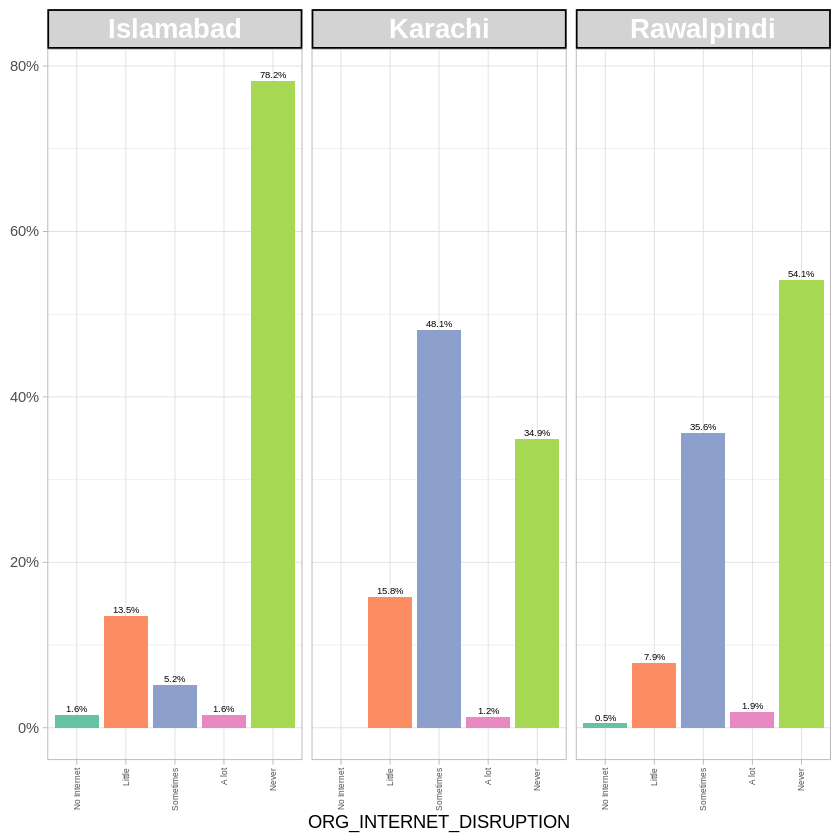

In [441]:
bar_prop_fun("ORG_INTERNET_DISRUPTION","ORG_CITY")

In [442]:

# Now using MAP, fixing facet variable to ORG_CITY
#uni_plots = map(uni_var, ~bar_fun(.x, "ORG_CITY") )
uni_plots = map(uni_var, ~bar_prop_fun(.x, "ORG_CITY") )

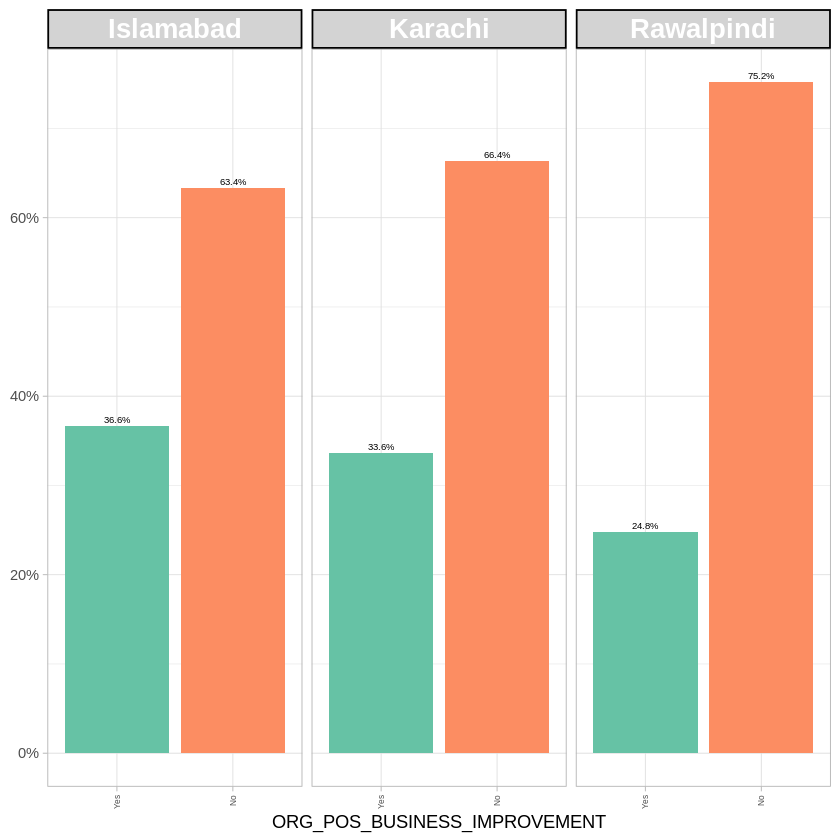

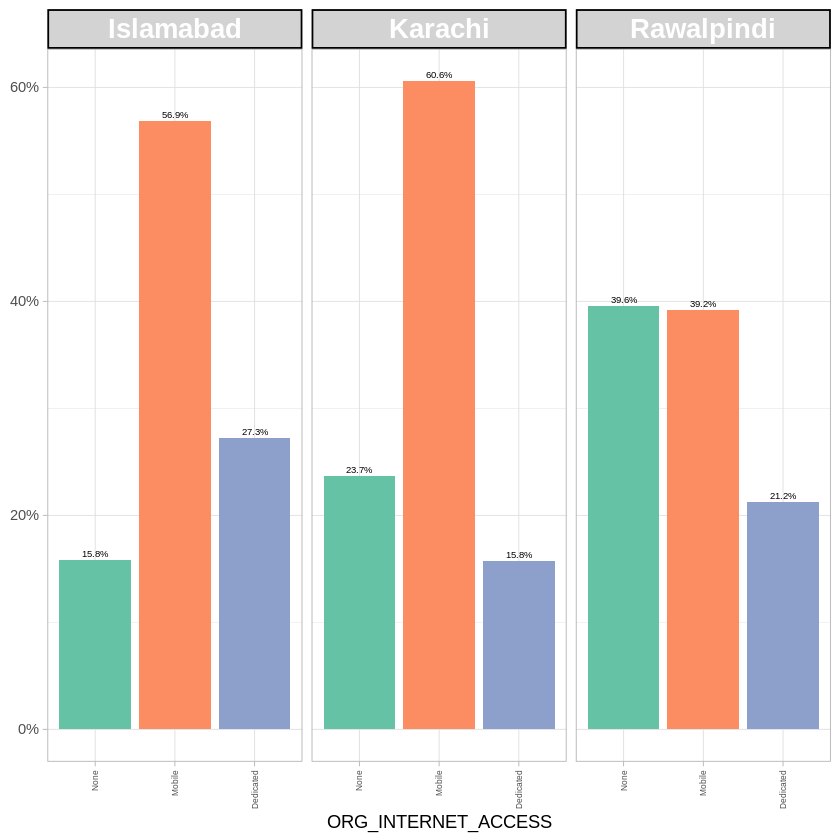

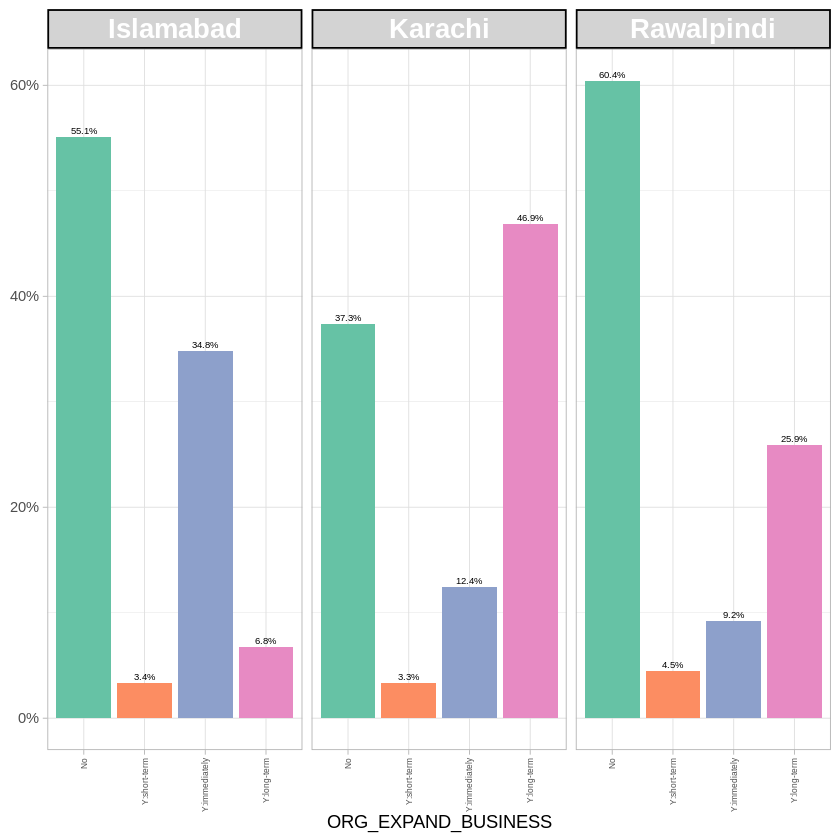

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


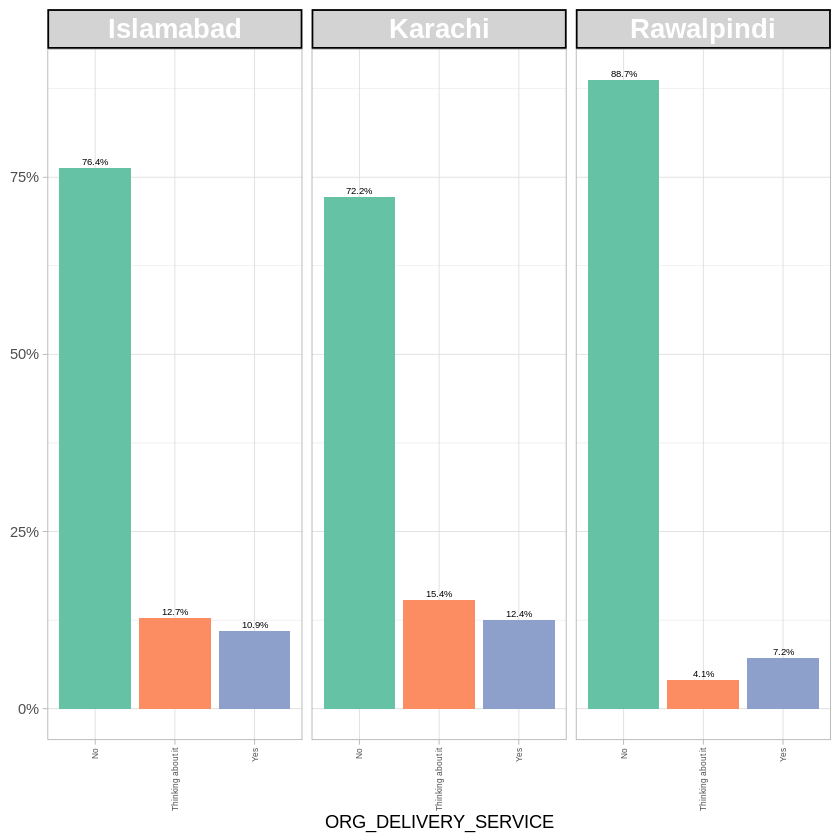

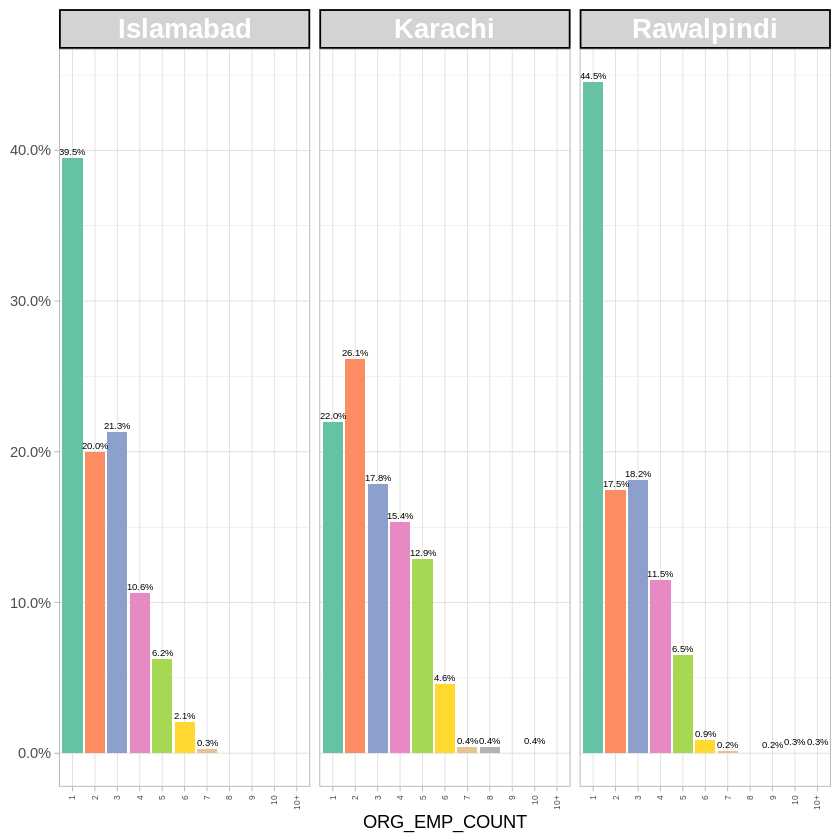

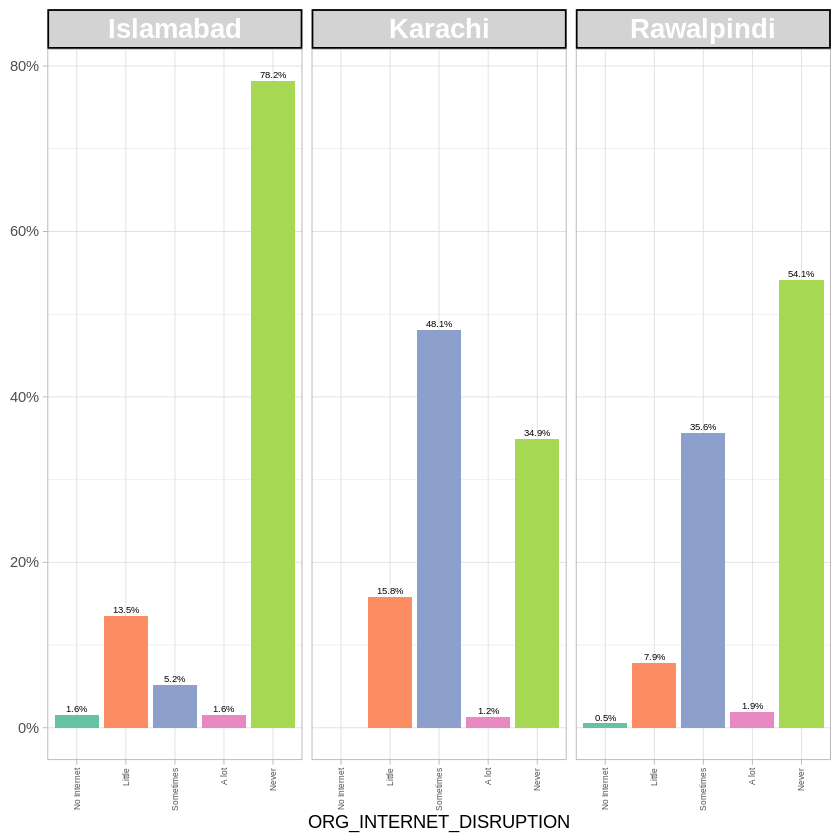

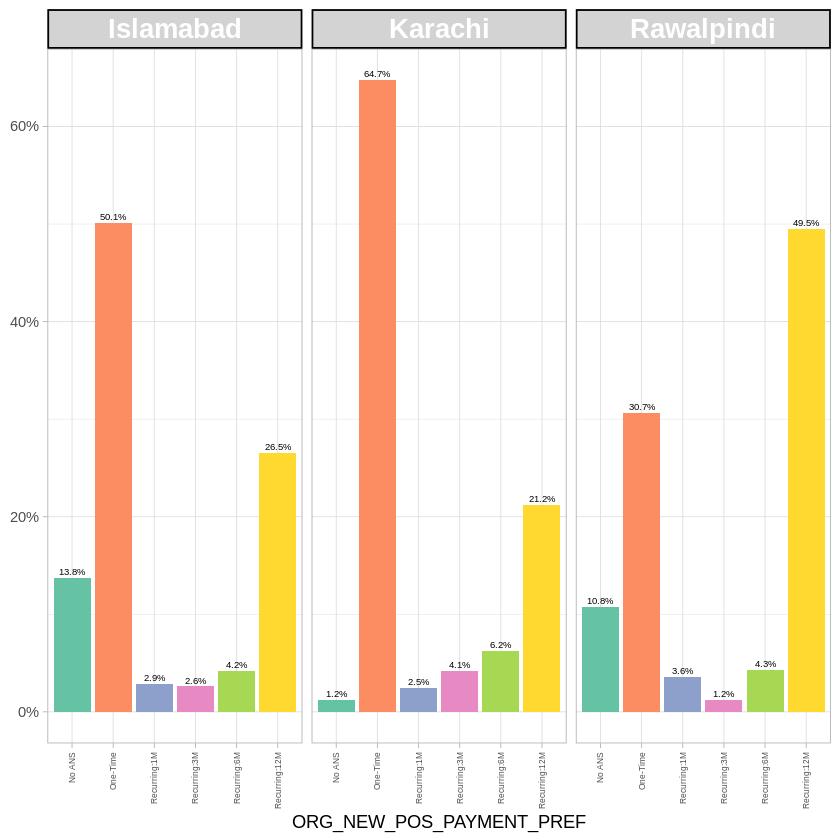

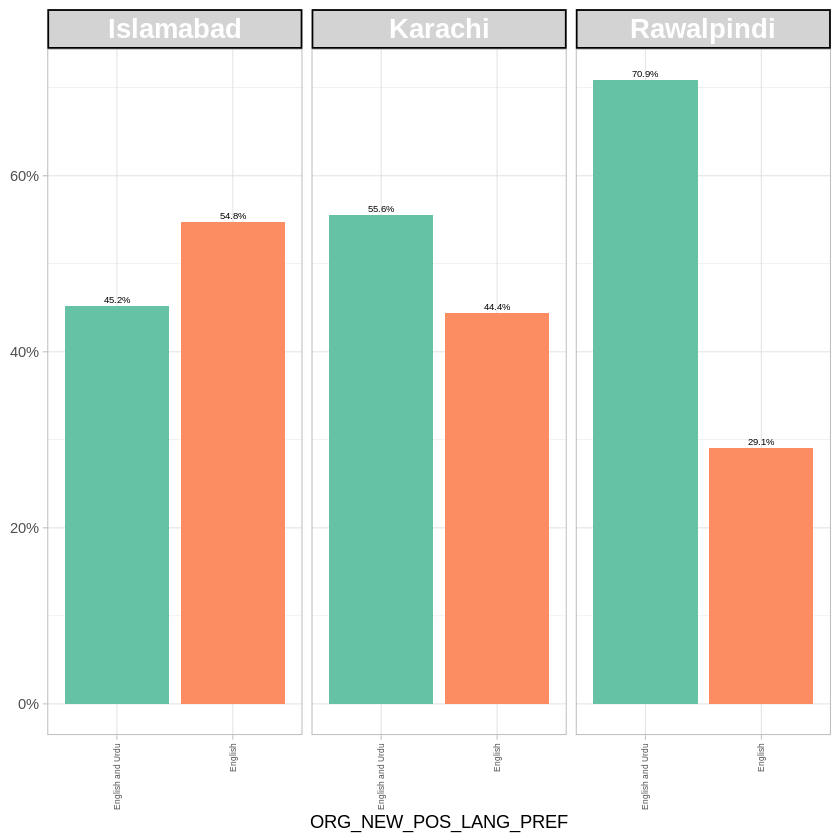

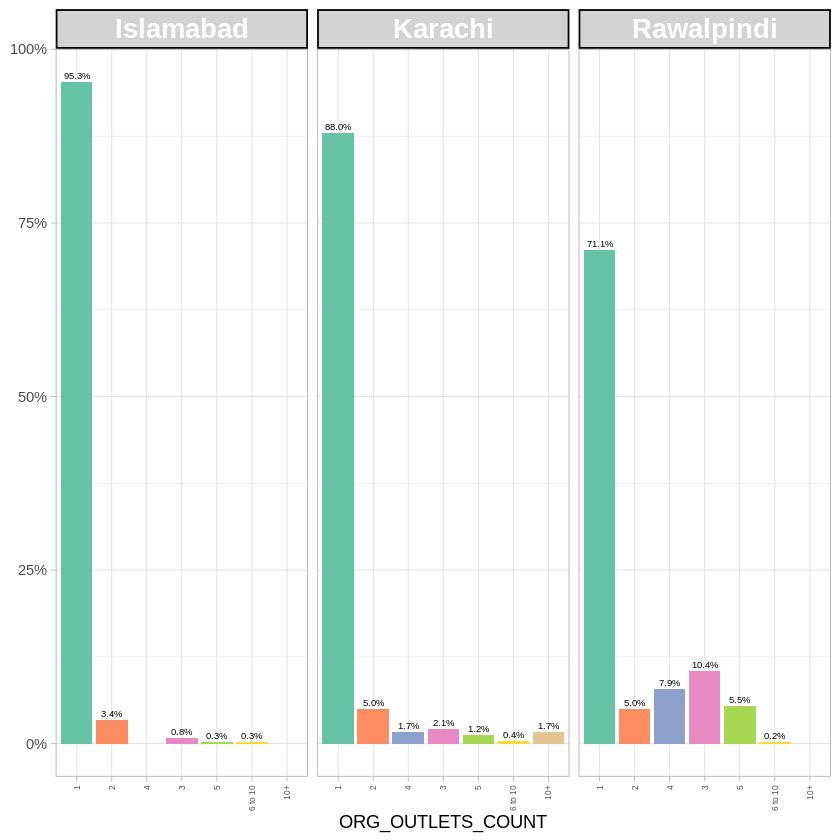

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


$ORG_POS_BUSINESS_IMPROVEMENT

$ORG_INTERNET_ACCESS

$ORG_EXPAND_BUSINESS

$ORG_DELIVERY_SERVICE

$ORG_EMP_COUNT

$ORG_INTERNET_DISRUPTION

$ORG_NEW_POS_PAYMENT_PREF

$ORG_NEW_POS_LANG_PREF

$ORG_OUTLETS_COUNT

$ORG_NEW_POS_KIND

$ORG_WILLINGNESS_TO_PAY_AMOUNT


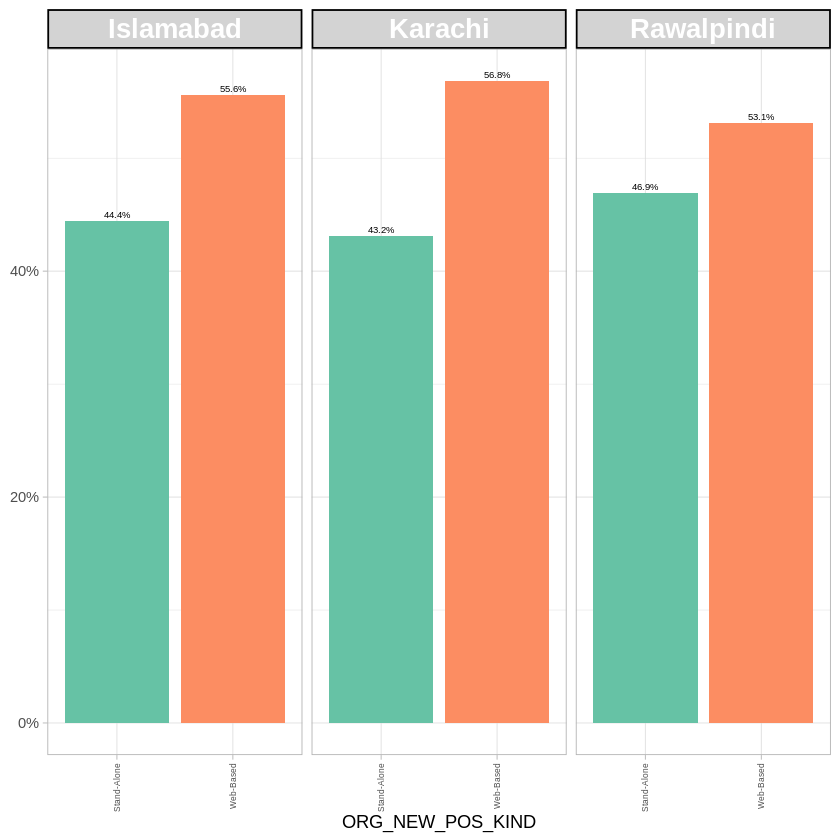

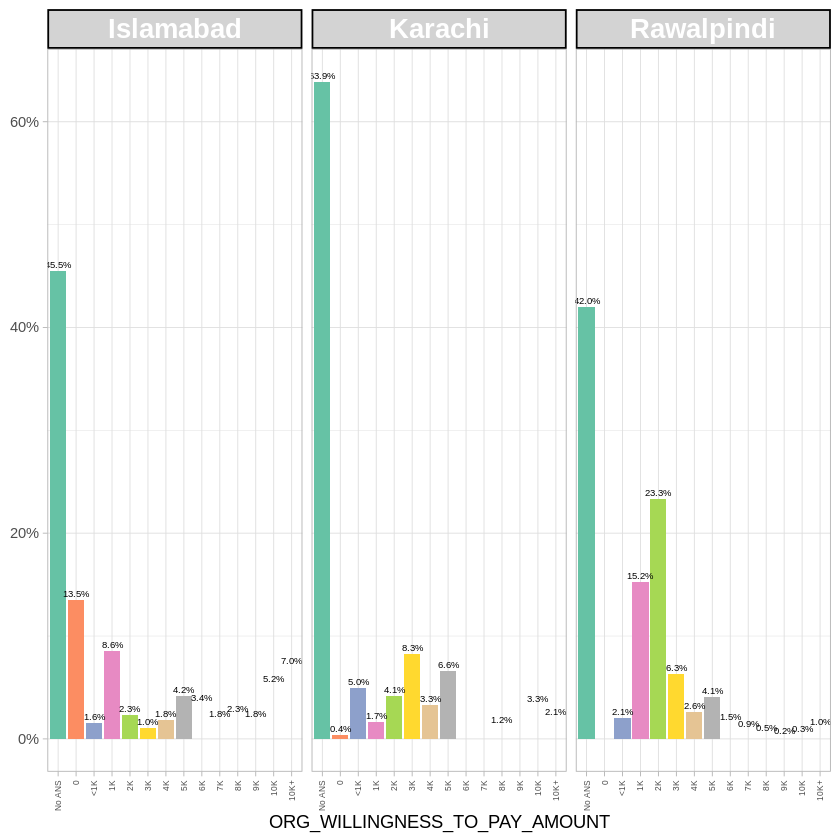

In [443]:
uni_plots

In [444]:
# SB_REGION should be plotted, without facetting
#'SB_REGION'

In [445]:
# printing the plots
st=format(Sys.time(), "%Y-%m-%d_%H:%M")
survey_plot_file = paste ("Plots_", "WithPOS_",st, ".pdf", sep="")
#pdf("Analysis_WithPOS_v6.pdf")
pdf(survey_plot_file)
uni_plots
dev.off()

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


$ORG_POS_BUSINESS_IMPROVEMENT

$ORG_INTERNET_ACCESS

$ORG_EXPAND_BUSINESS

$ORG_DELIVERY_SERVICE

$ORG_EMP_COUNT

$ORG_INTERNET_DISRUPTION

$ORG_NEW_POS_PAYMENT_PREF

$ORG_NEW_POS_LANG_PREF

$ORG_OUTLETS_COUNT

$ORG_NEW_POS_KIND

$ORG_WILLINGNESS_TO_PAY_AMOUNT


png 
  2

# Dumping Data for Further Analysis

In [446]:
#st=format(Sys.Date(), "%Y%b%d") # Alphabetic Month Name
st=format(Sys.time(), "%Y-%m-%d_%H:%M")
survey_data_file = paste ("SurveyData-", "withPOS-",st, ".xlsx", sep="")
print(survey_data_file)

[1] "SurveyData-withPOS-2021-05-11_08:54.xlsx"


In [447]:
## Create a new workbook
wb <- createWorkbook("Temp")
## Add 1 worksheets
addWorksheet(wb, "All POS Survey")
writeData(wb, "All POS Survey", df_with_2)
#saveWorkbook(wb, "SurveyData-20201028-North.xlsx", overwrite = TRUE)
saveWorkbook(wb, survey_data_file, overwrite = TRUE)

# Summary
 The above analysis is for 'With POS'

 It excludes uni-var analysis for certain variables - (multiple choice options):

1.   ORG_TYPE
2.   ORG_DISCOUNTS_OFFERED
3.   ORG_CUSTOMER_DATA
4.   ORG_POS_FEATURES
5.   ORG_OLD_POS_PAYMENT_OPTIONS
6.   ORG_OLD_POS_DEVICES
7.   ORG_OLD_POS_URDU_FEATURES
8.   ORG_REASON_TO_REPLACE_POS
9.   ORG_WILLINGNESS_TO_PAY_AMOUNT
10.   ORG_OLD_POS_PROVIDER_PAYMENT_METHOD




## ToDO

Fix uni-var analysis

